# *Part A*

In [ ]:
#Needed imports
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly fliping images
    transforms.RandomCrop(32, padding=4),  # Randomly croping images
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])


train_val_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_size = int(0.8 * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size
train_dataset, val_dataset = random_split(train_val_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        # Convolution layers
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        
        # Batch Normalization
        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(256)
        self.bn4 = nn.BatchNorm2d(512)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(512 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        
        # Dropout 
        self.dropout = nn.Dropout(0.5)
        
        # weights Calculation
        self.calculate_weights()

    def calculate_weights(self):
        # Calculate weights for each layer
        conv1_weights = (3 * 3 * 3 + 1) * 64
        conv2_weights = (64 * 3 * 3 + 1) * 128
        conv3_weights = (128 * 3 * 3 + 1) * 256
        conv4_weights = (256 * 3 * 3 + 1) * 512
        fc1_weights = (512 * 2 * 2 + 1) * 512
        fc2_weights = (512 + 1) * 256
        fc3_weights = (256 + 1) * 10

        print("Weight calculations:")
        print(f"Conv1 Weights: {conv1_weights}")
        print(f"Conv2 Weights: {conv2_weights}")
        print(f"Conv3 Weights: {conv3_weights}")
        print(f"Conv4 Weights: {conv4_weights}")
        print(f"FC1 Weights: {fc1_weights}")
        print(f"FC2 Weights: {fc2_weights}")
        print(f"FC3 Weights: {fc3_weights}")
        print(f"Total Weights: {conv1_weights + conv2_weights + conv3_weights + conv4_weights + fc1_weights + fc2_weights + fc3_weights}")
        
    def forward(self, x):
        # Convolutional layers with ReLU activation and batch normalization
        x = self.pool(self.bn1(torch.relu(self.conv1(x))))
        x = self.pool(self.bn2(torch.relu(self.conv2(x))))
        x = self.pool(self.bn3(torch.relu(self.conv3(x))))
        x = self.pool(self.bn4(torch.relu(self.conv4(x))))
        
        # Flattenning the output for the           fully connected layers
        x = x.view(-1, 512 * 2 * 2)
        
        # Fully connected layers with ReLU activation
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# *CNN Construction*

## <u>*Convolutional Layers*</u>

### *Layer 1*
Number of Filters (K): 64

Filter Size (F X F): 3x3

Input Channels (C_in): 3

### *Layer 2*
Number of Filters (K): 128

Filter Size (F X F): 3x3

Input Channels (C_in): 64


### *Layer 3*

Number of Filters (K): 256

Filter Size (F X F): 3x3

Input Channels (C_in): 128


### *Layer 4*

Number of Filters (K): 512

Filter Size (F x F): 3x3

Input Channels (C_in): 256

## <u>*Fully Connected Layers*</u>

### *Layer 1*
Input Units (N_{in}): 512 * 2 * 2 = 2048

Output Units (N_{out}): 512


### *Layer 2*

Input Units (N_{in}): 512

Output Units (N_{out}): 256

### *Layer 3*
Input Units (N_{in}): 256

Output Units (N_{out}): 10

# *Overfitting Prevention*

To prevent overfitting of the training model, I have used two techniques:

## <u>Data Augmentation:</u>

The model will randomly flip and corp the images before shuffling and splitting the data. This approach allows the data to be seen in different ways, forcing the model to create deeper connections.

## <u>Dropout:</u>
The model randomly deactivates a fraction of neurons during each training step, forcing it to consider more relevant and generalized features rather than relying on specific neurons.

In [4]:
model = EnhancedCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Weight calculations:
Conv1 Weights: 1792
Conv2 Weights: 73856
Conv3 Weights: 295168
Conv4 Weights: 1180160
FC1 Weights: 1049088
FC2 Weights: 131328
FC3 Weights: 2570
Total Weights: 2733962


# *Weights Calculations*

## *Convolutional Layers*

### <u>*Conv1 Layer*</u>

Number of Filters (K): 64

Filter Size (F x F): 3x3

Input Channels (C_in): 3

Number of Weights: Weights per Filter - 3×3×3 = 27

Total Weights :  (27×64)+64 = 1792

(+64) is the number of biases, one per filter.

### <u>*Conv2 Layer*</u>

Number of Filters (K): 128

Filter Size (F x F): 3x3

Input Channels (C_in): 64

Number of Weights: Weights per Filter - 3×3×64 = 576

Total Weights : (576×128)+128 = 73856

Biases = 128.

### <u>*Conv3 Layer*</u>

Number of Filters (K): 256

Filter Size (F x F): 3x3

Input Channels (C_in): 128

Number of Weights: Weights per Filter - 3×3×128 = 1152

Total Weights : (1152×256)+256 = 295168

Biases = 256.


### <u>*Conv4 Layer*</u>

Number of Filters (K): 512

Filter Size (F x F): 3x3

Input Channels (C_in): 256

Number of Weights: Weights per Filter - 3×3×256 = 2304

Total Weights : (2304×512)+512 = 1180160

Biases = 512.

## *Fully Connected Layers*

### <u>*FC1 Layer*</u>

Input Units (N_{in}): 512 * 2 * 2 = 2048

Output Units (N_{out}): 512

Number of Weights : Total Weights - (2048×512)+512 = 1049088

Biases = 512.


### <u>*FC2 Layer*</u>

Input Units (N_{in}): 512

Output Units (N_{out}): 256

Number of Weights : Total Weights - (512×256)+256 = 131328

Biases = 256.

### <u>*FC3 Layer*</u>

Input Units (N_{in}): 256

Output Units (N_{out}): 10

Number of Weights : Total Weights - (256×10)+10 = 2570

Biases = 10.


Summary
Total Weights for Conv1: 1792
Total Weights for Conv2: 73856
Total Weights for Conv3: 295168
Total Weights for Conv4: 1180160
Total Weights for FC1: 1049088
Total Weights for FC2: 131328
Total Weights for FC3: 2570

Grand Total: 1792 + 73856 + 1180160 + 1049088 + 131328 + 131328 + 2570 = 2733962

The total number of parameters (weights + biases) in your EnhancedCNN model is:  
# *2,733,962*

# *Training + Validation*

In [5]:
def train_and_validate(model, train_loader, val_loader, criterion, optimizer, epochs=20):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_accuracy = 100 * correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")
    
    return train_losses, val_losses, train_accuracies, val_accuracies

train_losses, val_losses, train_accuracies, val_accuracies = train_and_validate(model, train_loader, val_loader, criterion, optimizer)


Epoch [1/20], Train Loss: 1.5490, Train Acc: 43.48%, Val Loss: 1.1886, Val Acc: 56.96%
Epoch [2/20], Train Loss: 1.1242, Train Acc: 61.12%, Val Loss: 0.9855, Val Acc: 66.29%
Epoch [3/20], Train Loss: 0.9599, Train Acc: 67.80%, Val Loss: 0.8520, Val Acc: 71.74%
Epoch [4/20], Train Loss: 0.8584, Train Acc: 71.69%, Val Loss: 0.7266, Val Acc: 75.50%
Epoch [5/20], Train Loss: 0.7874, Train Acc: 74.00%, Val Loss: 0.7352, Val Acc: 75.11%
Epoch [6/20], Train Loss: 0.7444, Train Acc: 75.64%, Val Loss: 0.6765, Val Acc: 77.36%
Epoch [7/20], Train Loss: 0.6990, Train Acc: 77.32%, Val Loss: 0.6674, Val Acc: 77.43%
Epoch [8/20], Train Loss: 0.6690, Train Acc: 78.08%, Val Loss: 0.6290, Val Acc: 79.24%
Epoch [9/20], Train Loss: 0.6370, Train Acc: 79.26%, Val Loss: 0.5908, Val Acc: 80.28%
Epoch [10/20], Train Loss: 0.6124, Train Acc: 79.98%, Val Loss: 0.5856, Val Acc: 80.96%
Epoch [11/20], Train Loss: 0.5884, Train Acc: 81.31%, Val Loss: 0.6640, Val Acc: 78.29%
Epoch [12/20], Train Loss: 0.5592, Train 

# *Loss Function Visualization*

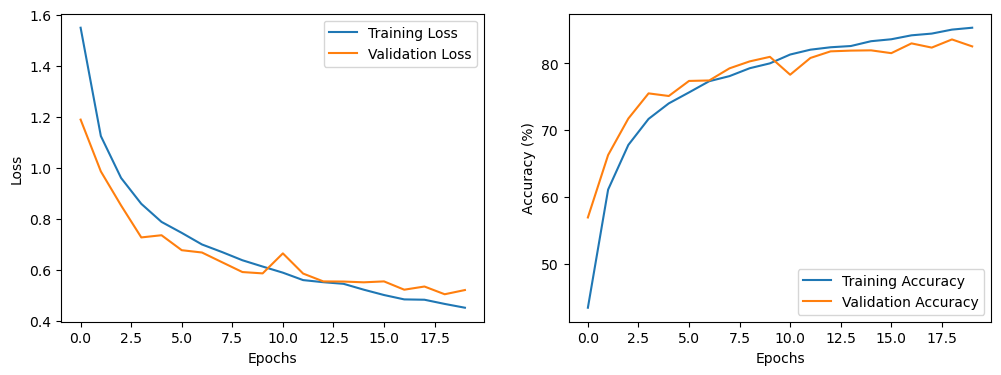

In [6]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,    2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

#  *Testing the model*

In [7]:
def test_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f'Test Accuracy: {100 * correct / total:.2f}%')
    print(f"Total tests: {total}")
    print(f"correct: {correct}")

test_model(model, test_loader)

Test Accuracy: 82.29%
Total tests: 10000
correct: 8229


# *conclusions*

After experimenting with several other activation functions (Tanh, Sigmoid, and Leaky ReLU) and different constructions of the CNN model (fewer layers, larger filters, etc.), I achieved the best outcome with this model, although I am not fully satisfied. I believe a better result can be achieved, perhaps with different hyperparameters that I have not yet considered. However, I can see that my overfitting prevention techniques have worked, and overall, the percentage is sufficient.